In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("myexcel.csv")
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [18]:
df['height'] = np.random.randint(150, 181, size=len(df))
print(df['height'].describe())

count    458.000000
mean     164.840611
std        8.879619
min      150.000000
25%      157.250000
50%      164.000000
75%      172.000000
max      180.000000
Name: height, dtype: float64


In [38]:
team_counts = df['Team'].value_counts()
team_percent = (team_counts / len(df)) * 100
team_df = pd.DataFrame({
    'Count': team_counts,
    'Percentage (%)': team_percent.round(2)
})

team_df

,Count,Percentage (%)
Team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
New York Knicks,16,3.49
Milwaukee Bucks,16,3.49
Brooklyn Nets,15,3.28
Portland Trail Blazers,15,3.28
Oklahoma City Thunder,15,3.28
Denver Nuggets,15,3.28


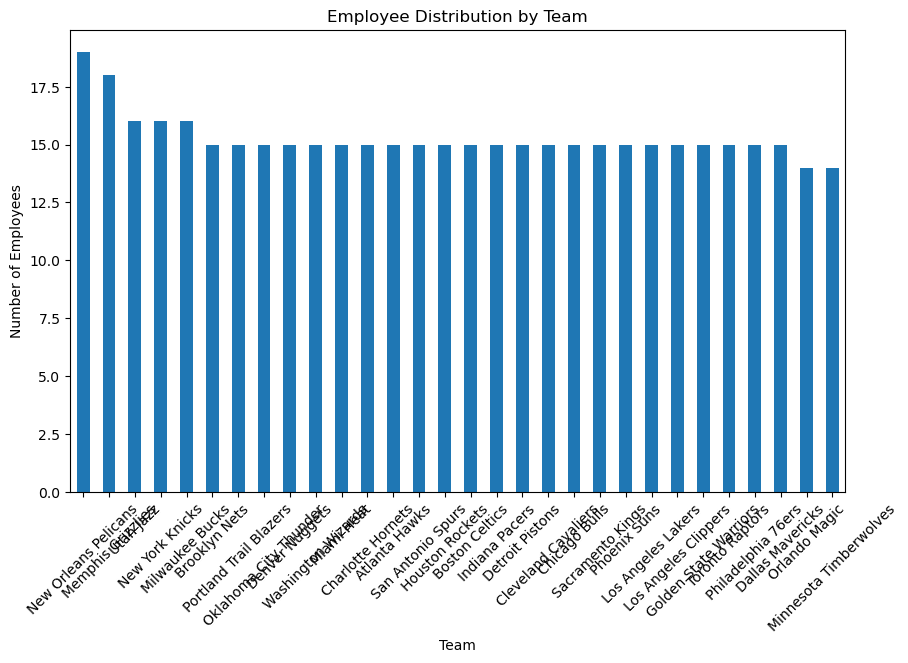

In [40]:
plt.figure(figsize=(10,6))
team_counts.plot(kind='bar')
plt.title("Employee Distribution by Team")
plt.xlabel("Team")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

In [41]:
position_counts = df['Position'].value_counts()
position_counts

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

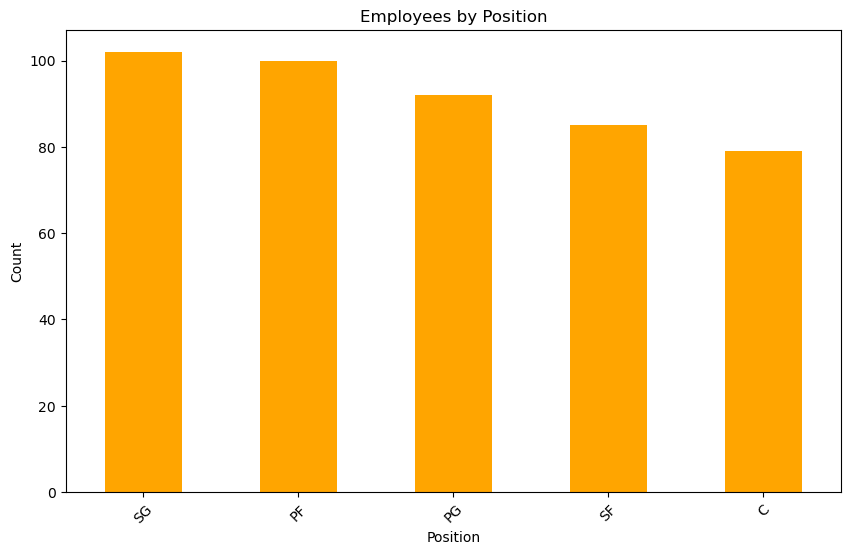

In [42]:
plt.figure(figsize=(10,6))
position_counts.plot(kind='bar', color='orange')
plt.title("Employees by Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [43]:
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
age_group_counts = df['Age Group'].value_counts()
age_group_counts

Age Group
26-35    235
18-25    200
36-45     23
46-55      0
56-65      0
Name: count, dtype: int64

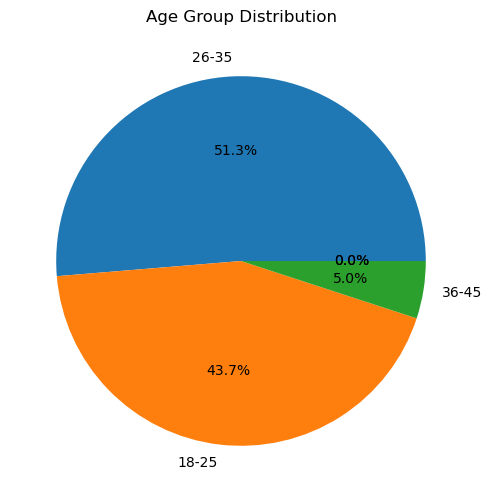

In [44]:
plt.figure(figsize=(8,6))
age_group_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Age Group Distribution")
plt.ylabel("")
plt.show()


In [45]:
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
team_salary

Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota Timberwolves     59709697.0
Boston 

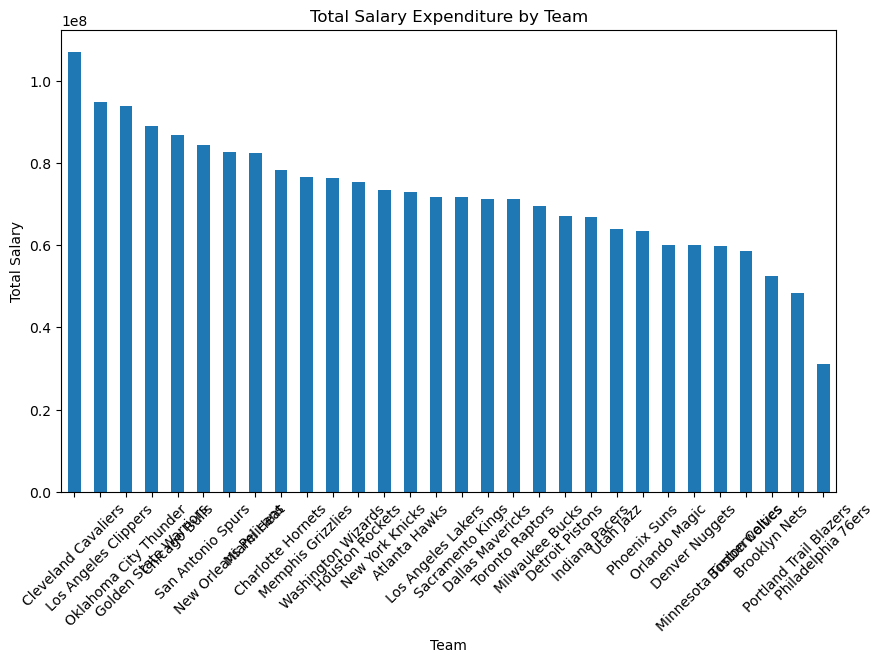

In [46]:
plt.figure(figsize=(10,6))
team_salary.plot(kind='bar')
plt.title("Total Salary Expenditure by Team")
plt.xlabel("Team")
plt.ylabel("Total Salary")
plt.xticks(rotation=45)
plt.show()

In [47]:
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)
position_salary

Position
C     466377332.0
PG    446848971.0
PF    442560850.0
SF    408020976.0
SG    396976258.0
Name: Salary, dtype: float64

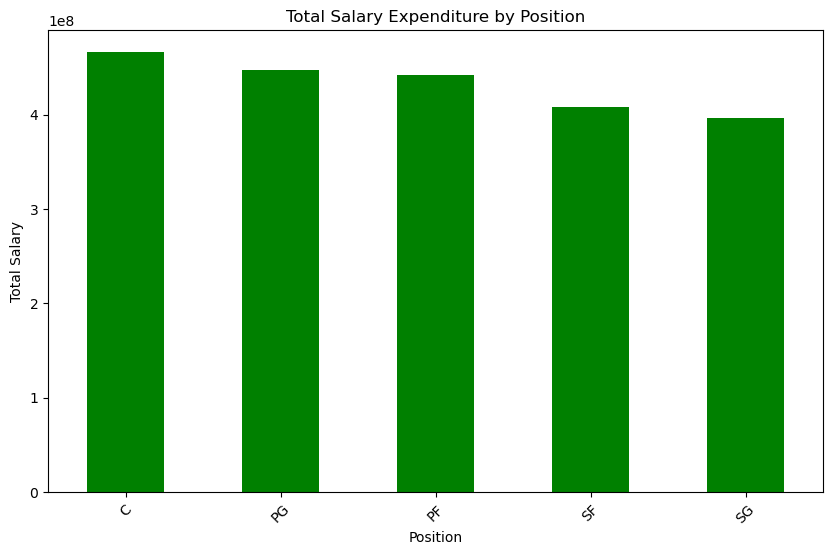

In [48]:
plt.figure(figsize=(10,6))
position_salary.plot(kind='bar', color='green')
plt.title("Total Salary Expenditure by Position")
plt.xlabel("Position")
plt.ylabel("Total Salary")
plt.xticks(rotation=45)
plt.show()

In [49]:
correlation = df['Age'].corr(df['Salary'])
correlation
import seaborn as sns

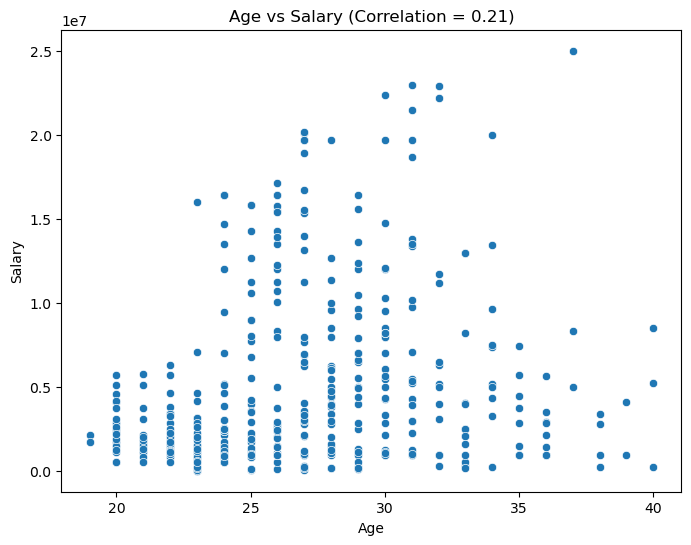

In [50]:
correlation = df['Age'].corr(df['Salary'])
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title(f"Age vs Salary (Correlation = {correlation:.2f})")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()